In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


In [3]:
train_df = pd.read_csv('C:\\Users\\Vedika Nalawade\\Downloads\\train (1).csv')
df = train_df.copy()

print('Shape of data{}'.format(df.shape))
print('Number of rows:{}'.format(df.shape[0]))
print('Number of rows:{}'.format(df.shape[1]))
df.info()

Shape of data(4250, 20)
Number of rows:4250
Number of rows:20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null  

In [4]:
df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


In [5]:
df.drop(columns=['account_length'] , axis=1 , inplace=True)

In [7]:
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}
              

In [8]:
# Preparing Table
a = round(df['churn'].value_counts()/len(df['churn']),2)
churn_ratio=  pd.DataFrame(a).T 
churn_ratio = churn_ratio.rename(columns={'no':'Not Churn' , 'yes':'Churn'})
churn_ratio 

,Not Churn,Churn
churn,0.86,0.14


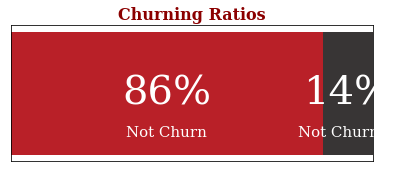

In [9]:
fig, ax = plt.subplots(1,1,figsize=(6.5,2.5))
ax.barh(churn_ratio.index, churn_ratio['Not Churn'],color='#b20710', alpha=0.9, label='Male')
ax.barh(churn_ratio.index, churn_ratio['Churn'], left=churn_ratio['Not Churn'],color='#221f1f', alpha=0.9, label='Female')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# /annotating code starts here
for i in churn_ratio.index:
    ax.annotate(f'{int(churn_ratio["Not Churn"][i]*100)}%',   xy=(churn_ratio['Not Churn'][i]/2, i), va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',color='white')
    ax.annotate('Not Churn',   xy=(churn_ratio['Not Churn'][i]/2, -0.25),va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')        
for i in churn_ratio.index:
	ax.annotate(f'{int(churn_ratio["Churn"][i]*100)}%' ,
                xy=(churn_ratio['Not Churn'][i]+churn_ratio['Churn'][i]/2,i),
                va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                color='white')
	ax.annotate('Not Churned' , xy=(churn_ratio['Not Churn'][i]+churn_ratio['Churn'][i]/2, -0.25),
                    va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                    color='white')
plt.title('Churning Ratios' , fontdict=axtitle_dict)
plt.show()

In [10]:
print(df.isna().sum().sort_values(ascending = False))
print('duplicate values in df' ,df.duplicated().sum() )
print('duplicates dropped')

state                            0
total_eve_charge                 0
number_customer_service_calls    0
total_intl_charge                0
total_intl_calls                 0
total_intl_minutes               0
total_night_charge               0
total_night_calls                0
total_night_minutes              0
total_eve_calls                  0
area_code                        0
total_eve_minutes                0
total_day_charge                 0
total_day_calls                  0
total_day_minutes                0
number_vmail_messages            0
voice_mail_plan                  0
international_plan               0
churn                            0
dtype: int64
duplicate values in df 0
duplicates dropped


In [11]:
df.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churn'],
      dtype='object')

In [12]:
categ_columns = []
for col in df.columns:
	if df[col].nunique()<10:
		categ_columns.append(col) 
        
print('categ numericals columns are {}'.format(categ_columns))

Num_cols = ['number_vmail_messages' ,'total_day_minutes' ,'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge' ]
print('nums numericals columns are {}'.format(Num_cols))

categ numericals columns are ['area_code', 'international_plan', 'voice_mail_plan', 'churn']
nums numericals columns are ['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']


In [13]:
df.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
state                              51
total_day_calls                   120
total_eve_calls                   123
total_night_calls                 128
total_intl_minutes                168
total_intl_charge                 168
total_night_charge                992
total_eve_charge                 1572
total_night_minutes              1757
total_eve_minutes                1773
total_day_minutes                1843
total_day_charge                 1843
dtype: int64

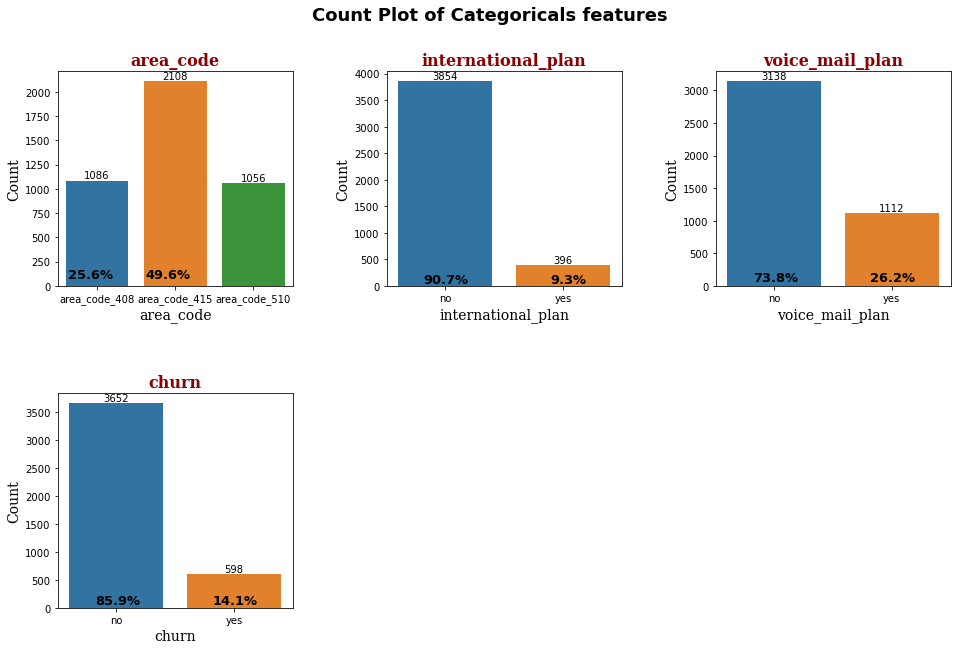

In [14]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i , columns in enumerate(categ_columns):
    input = np.unique(df[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(3, 3, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    #The below two lines of codes are used for percentage values.
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.set_title(f'{columns}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{columns}', fontdict=axlab_dict)
    ax1.set_ylabel('Count', fontdict=axlab_dict)
    ax1.bar_label(ax1.containers[0])

In [15]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ];

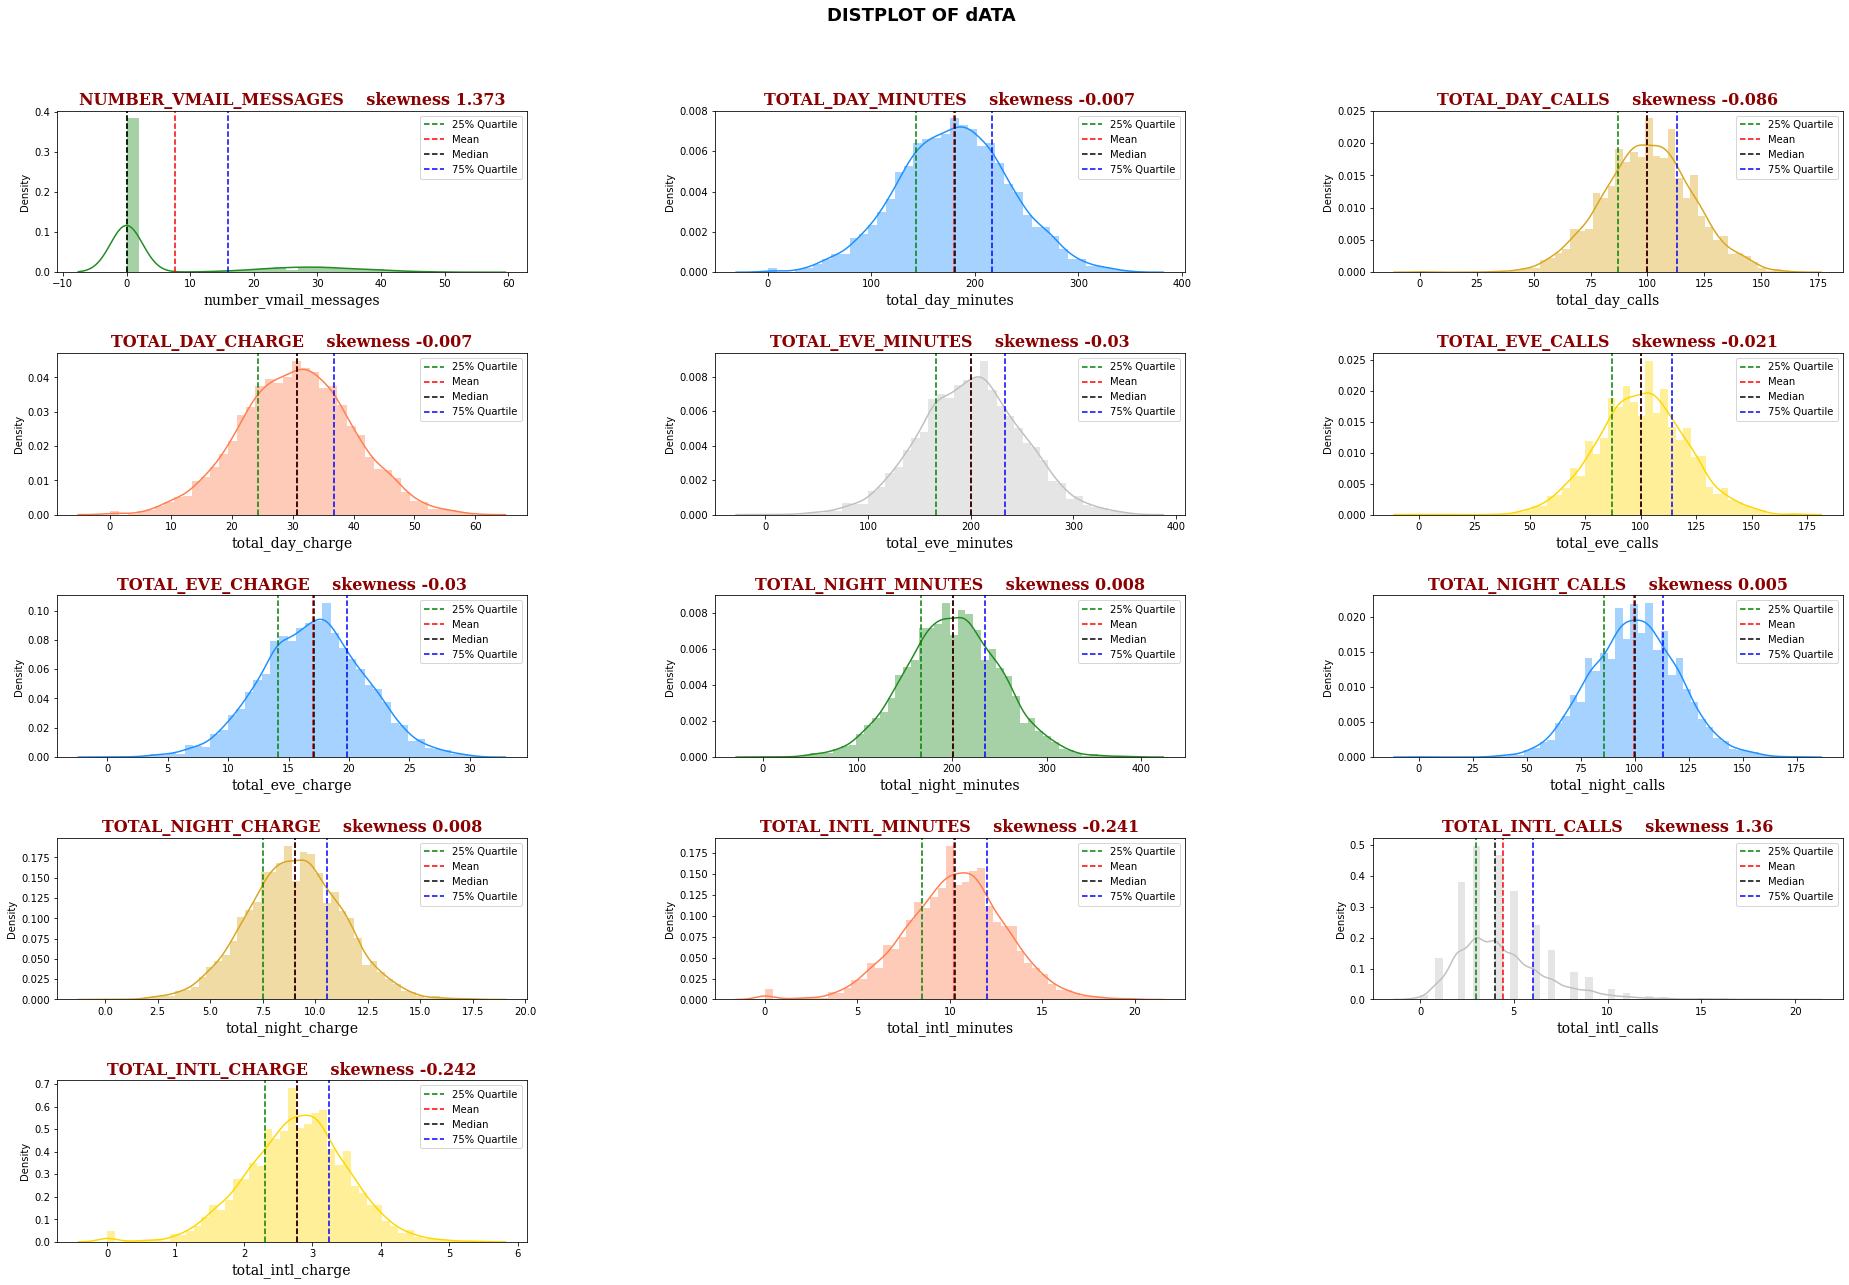

In [16]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    ax = fig.add_subplot(6, 3, i+1)
    ax = sns.distplot(df[col],  color=colours[i]) 
    ax.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}', fontdict=axtitle_dict)
    ax.legend(fontsize=10) 

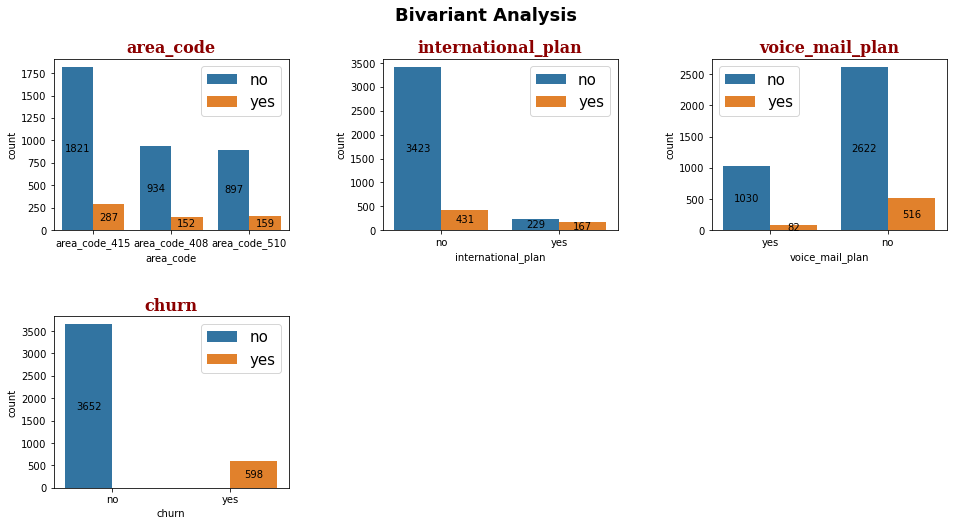

In [17]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.countplot(x = df[col] , ax=a , hue = df['churn'] )
    a.set_title(col , fontdict=axtitle_dict)
    a.bar_label(a.containers[0] , label_type='center') 
    a.bar_label(a.containers[1] , label_type='center')
    a.legend(fontsize=15)

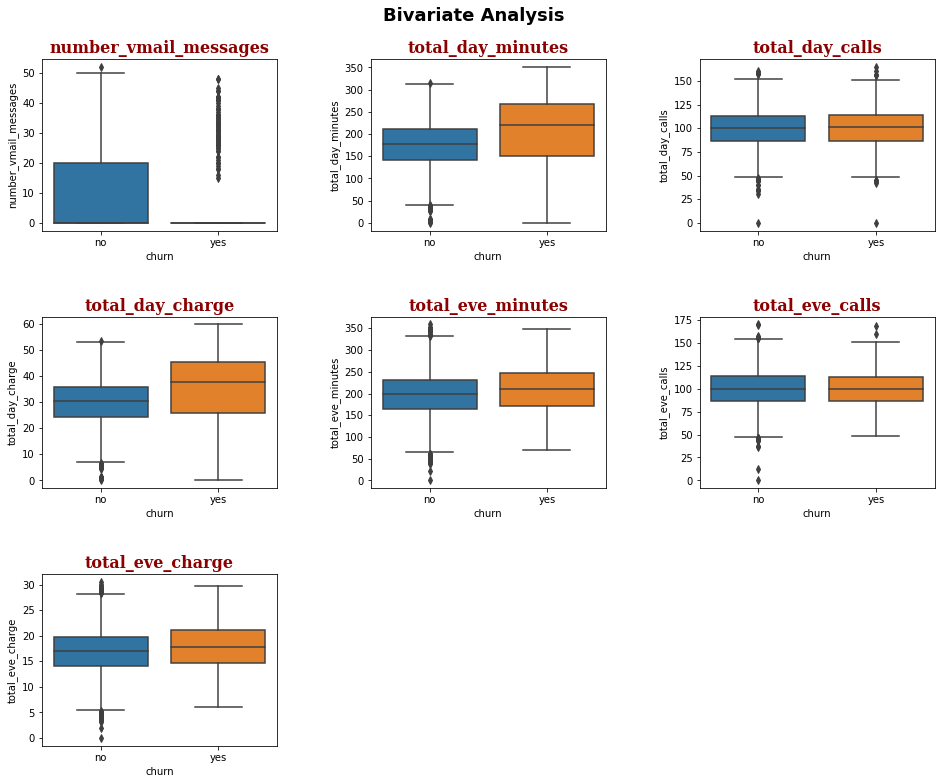

In [18]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols[0:7]):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.boxplot(x = 'churn' , y =col , ax=a  , data = df )
    a.set_title(col , fontdict=axtitle_dict)

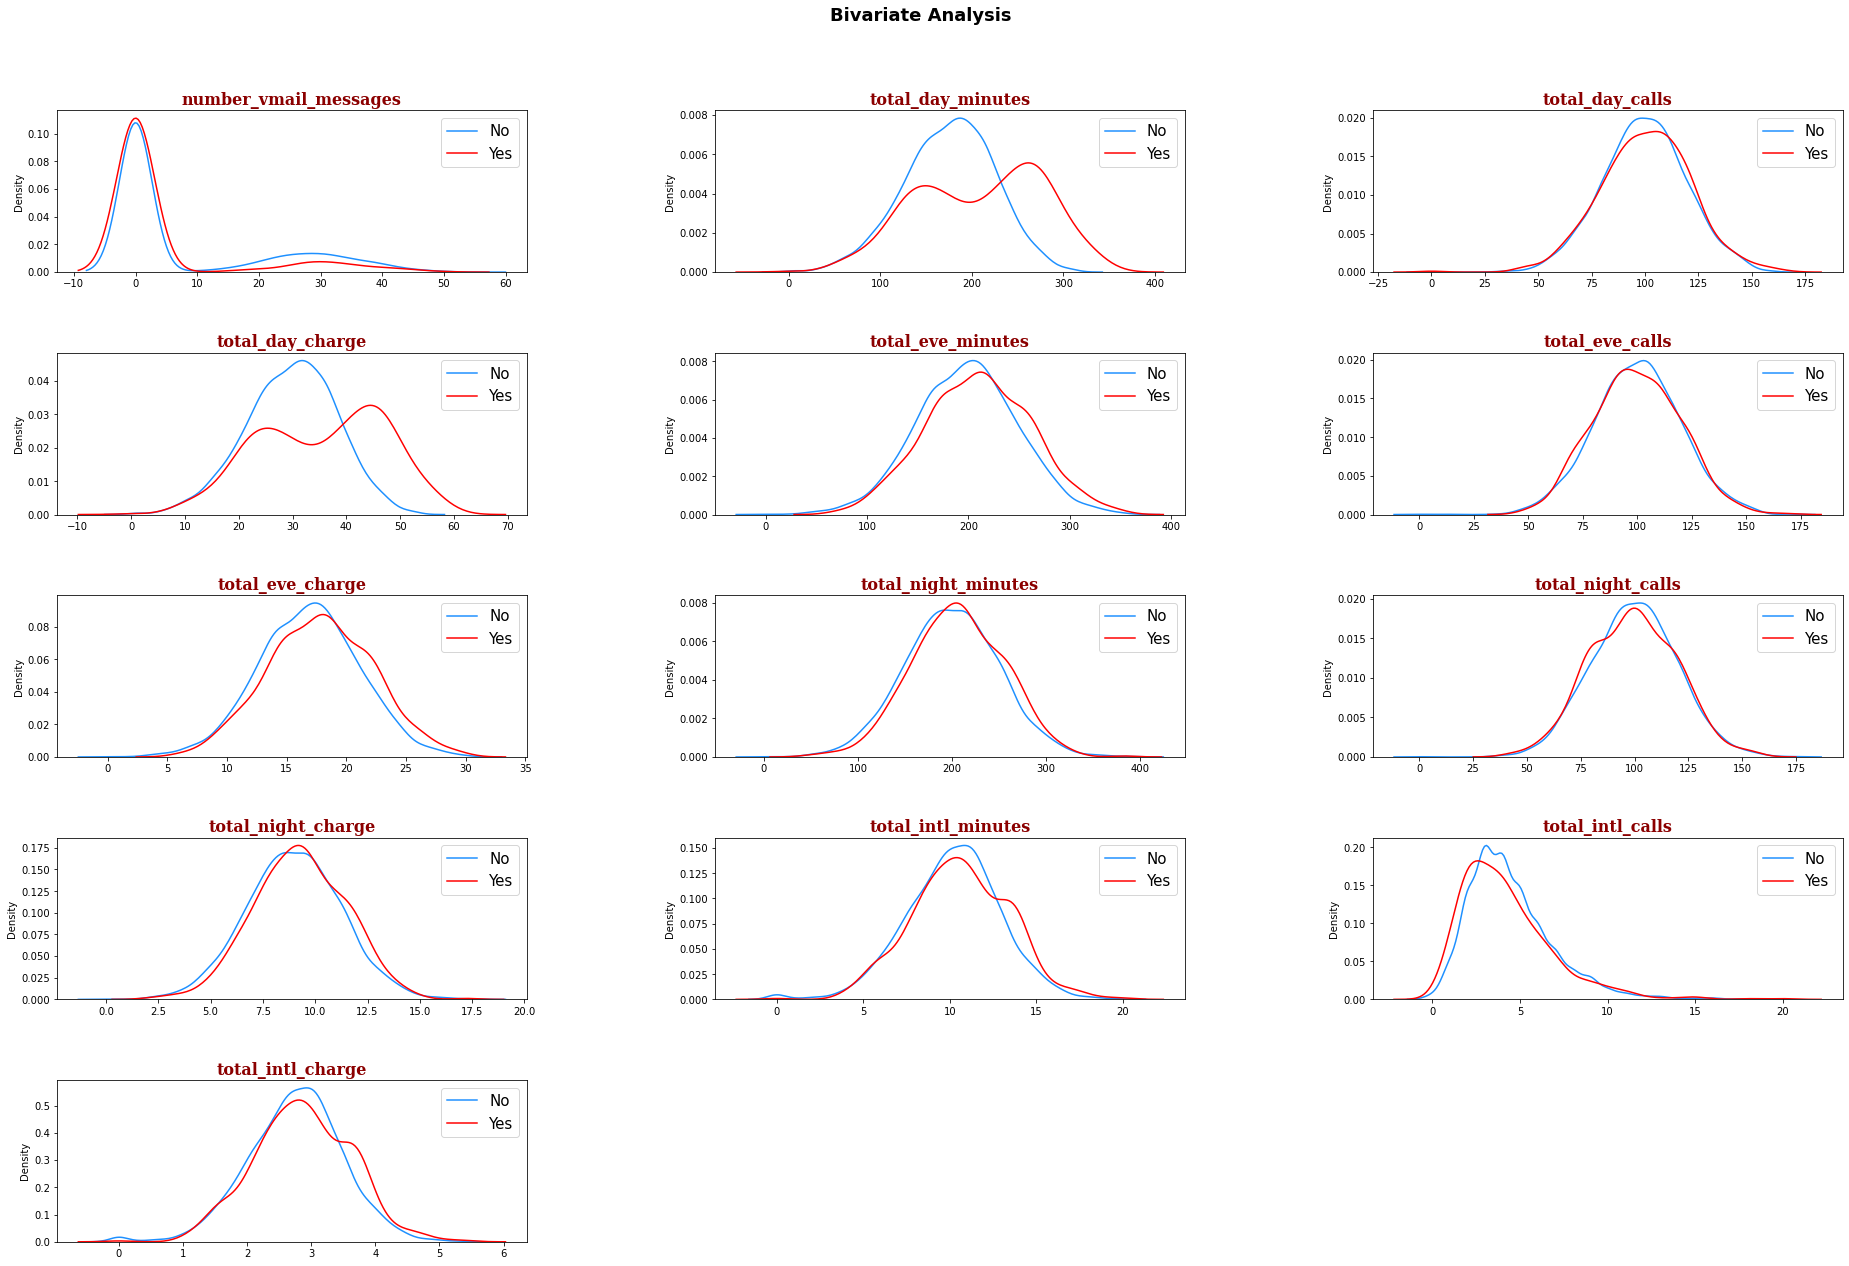

In [19]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    a = fig.add_subplot(6, 3, i+1)
    
    sns.distplot(x =df[df['churn']=='no'][col],  color='dodgerblue' , ax=a ,  hist =False)
    sns.distplot(x =df[df['churn']=='yes'][col],  color='red' , ax=a , hist =False) 
    a.set_title(col , fontdict=axtitle_dict)    
    labels = ['No' , 'Yes']
    a.legend( labels  , fontsize = 15)

In [20]:
# Check of outliers by applying the IQR method checking if values are way outside the IQR borders.
# numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_num = df[Num_cols]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

number_vmail_messages    True
total_day_minutes        True
total_day_calls          True
total_day_charge         True
total_eve_minutes        True
total_eve_calls          True
total_eve_charge         True
total_night_minutes      True
total_night_calls        True
total_night_charge       True
total_intl_minutes       True
total_intl_calls         True
total_intl_charge        True
dtype: bool

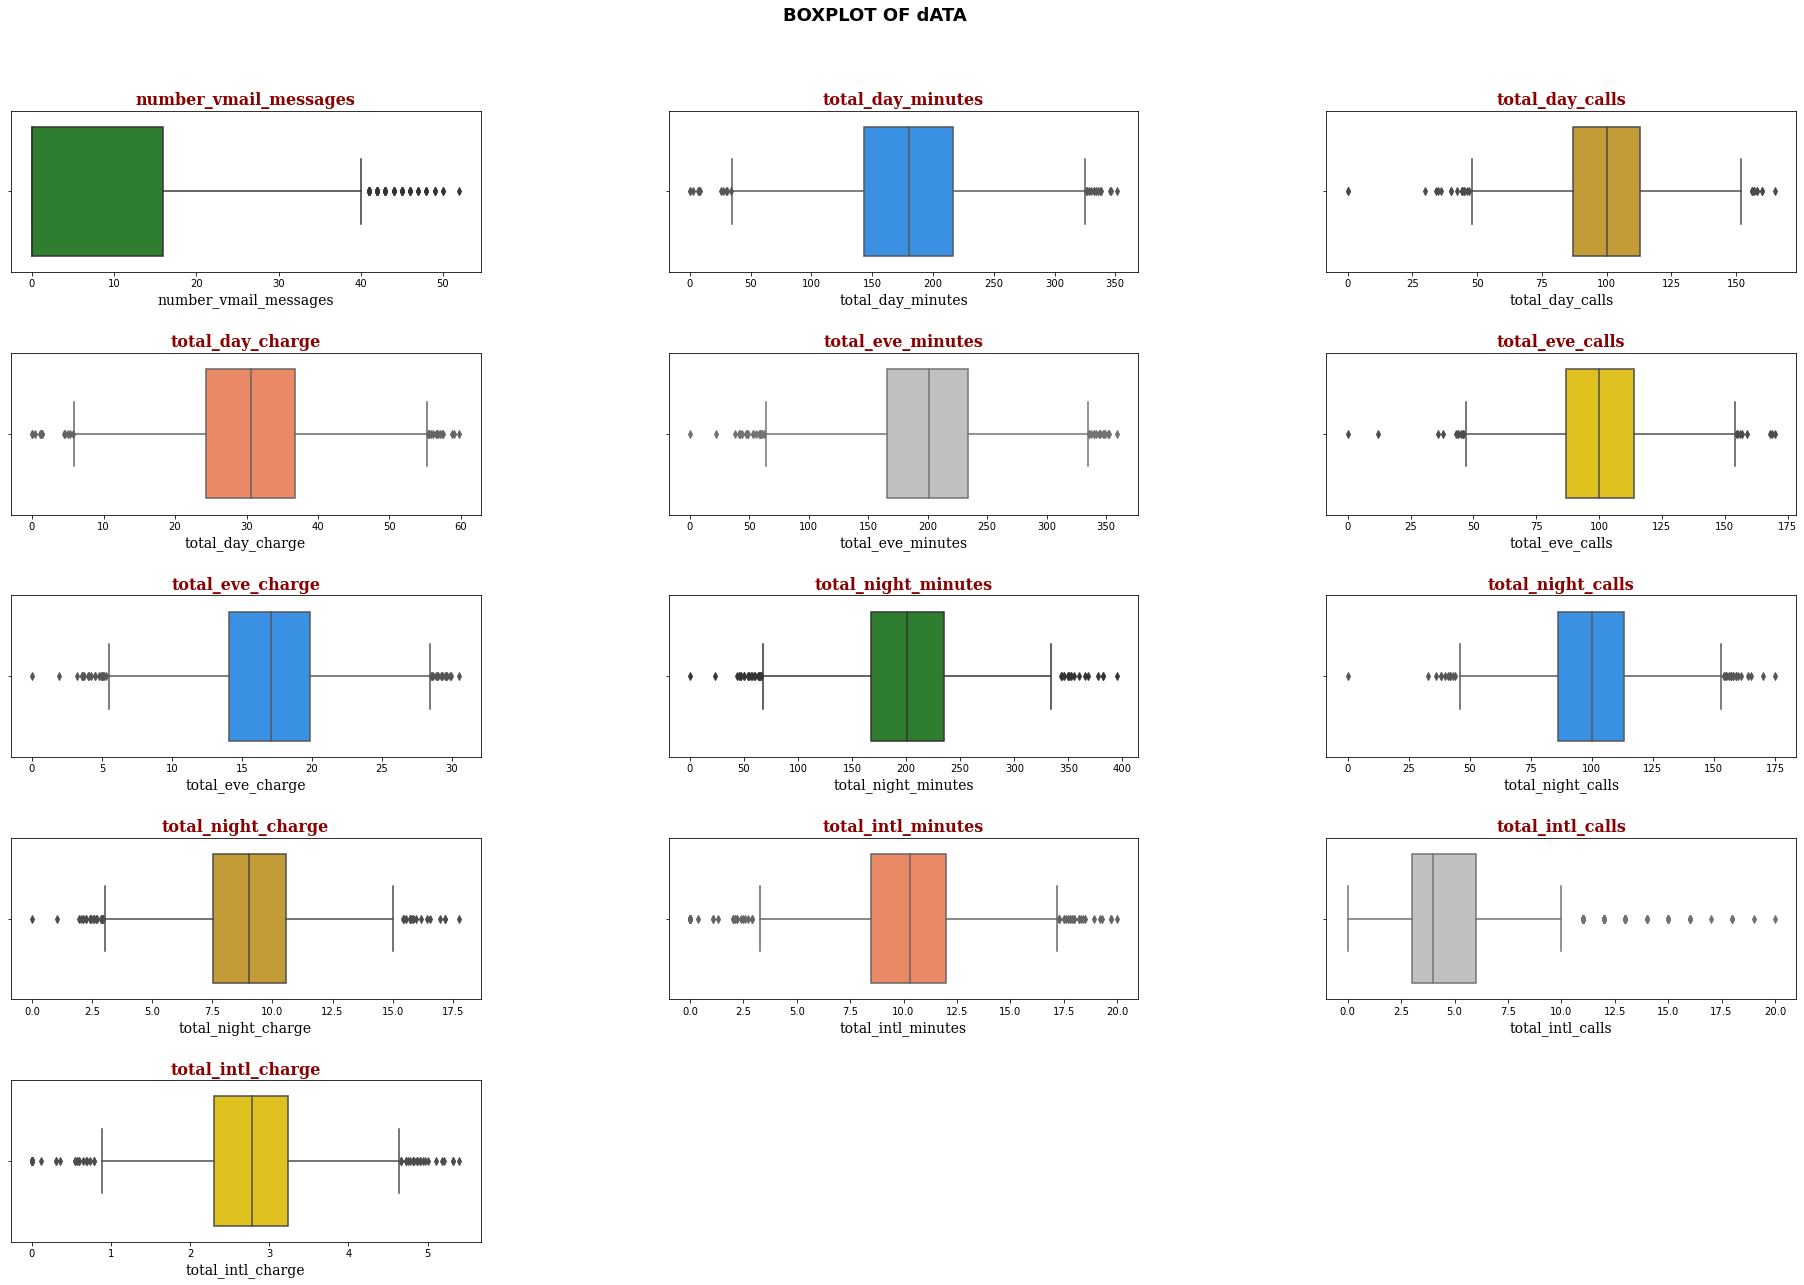

In [21]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
 
    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

In [22]:
# Finding the IQR For Budget columns
dict = {}
for col in Num_cols:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

In [23]:
for col in Num_cols:
    print('There are total {} Customers data which {} are less than lower limit.'.format(len(df[df[col] < dict['lower_limit_' + col]] ) , col))
    print('There are total {} Customers data which {} are more than upper limit.'.format(len(df[df[col] > dict['upper_limit_' + col]] ) , col))

There are total 0 Customers data which number_vmail_messages are less than lower limit.
There are total 86 Customers data which number_vmail_messages are more than upper limit.
There are total 12 Customers data which total_day_minutes are less than lower limit.
There are total 13 Customers data which total_day_minutes are more than upper limit.
There are total 18 Customers data which total_day_calls are less than lower limit.
There are total 10 Customers data which total_day_calls are more than upper limit.
There are total 12 Customers data which total_day_charge are less than lower limit.
There are total 14 Customers data which total_day_charge are more than upper limit.
There are total 19 Customers data which total_eve_minutes are less than lower limit.
There are total 15 Customers data which total_eve_minutes are more than upper limit.
There are total 13 Customers data which total_eve_calls are less than lower limit.
There are total 11 Customers data which total_eve_calls are more t

In [24]:
for col in Num_cols:
    df[col] = np.where(
        df[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            df[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            df[col]  
        )
    )

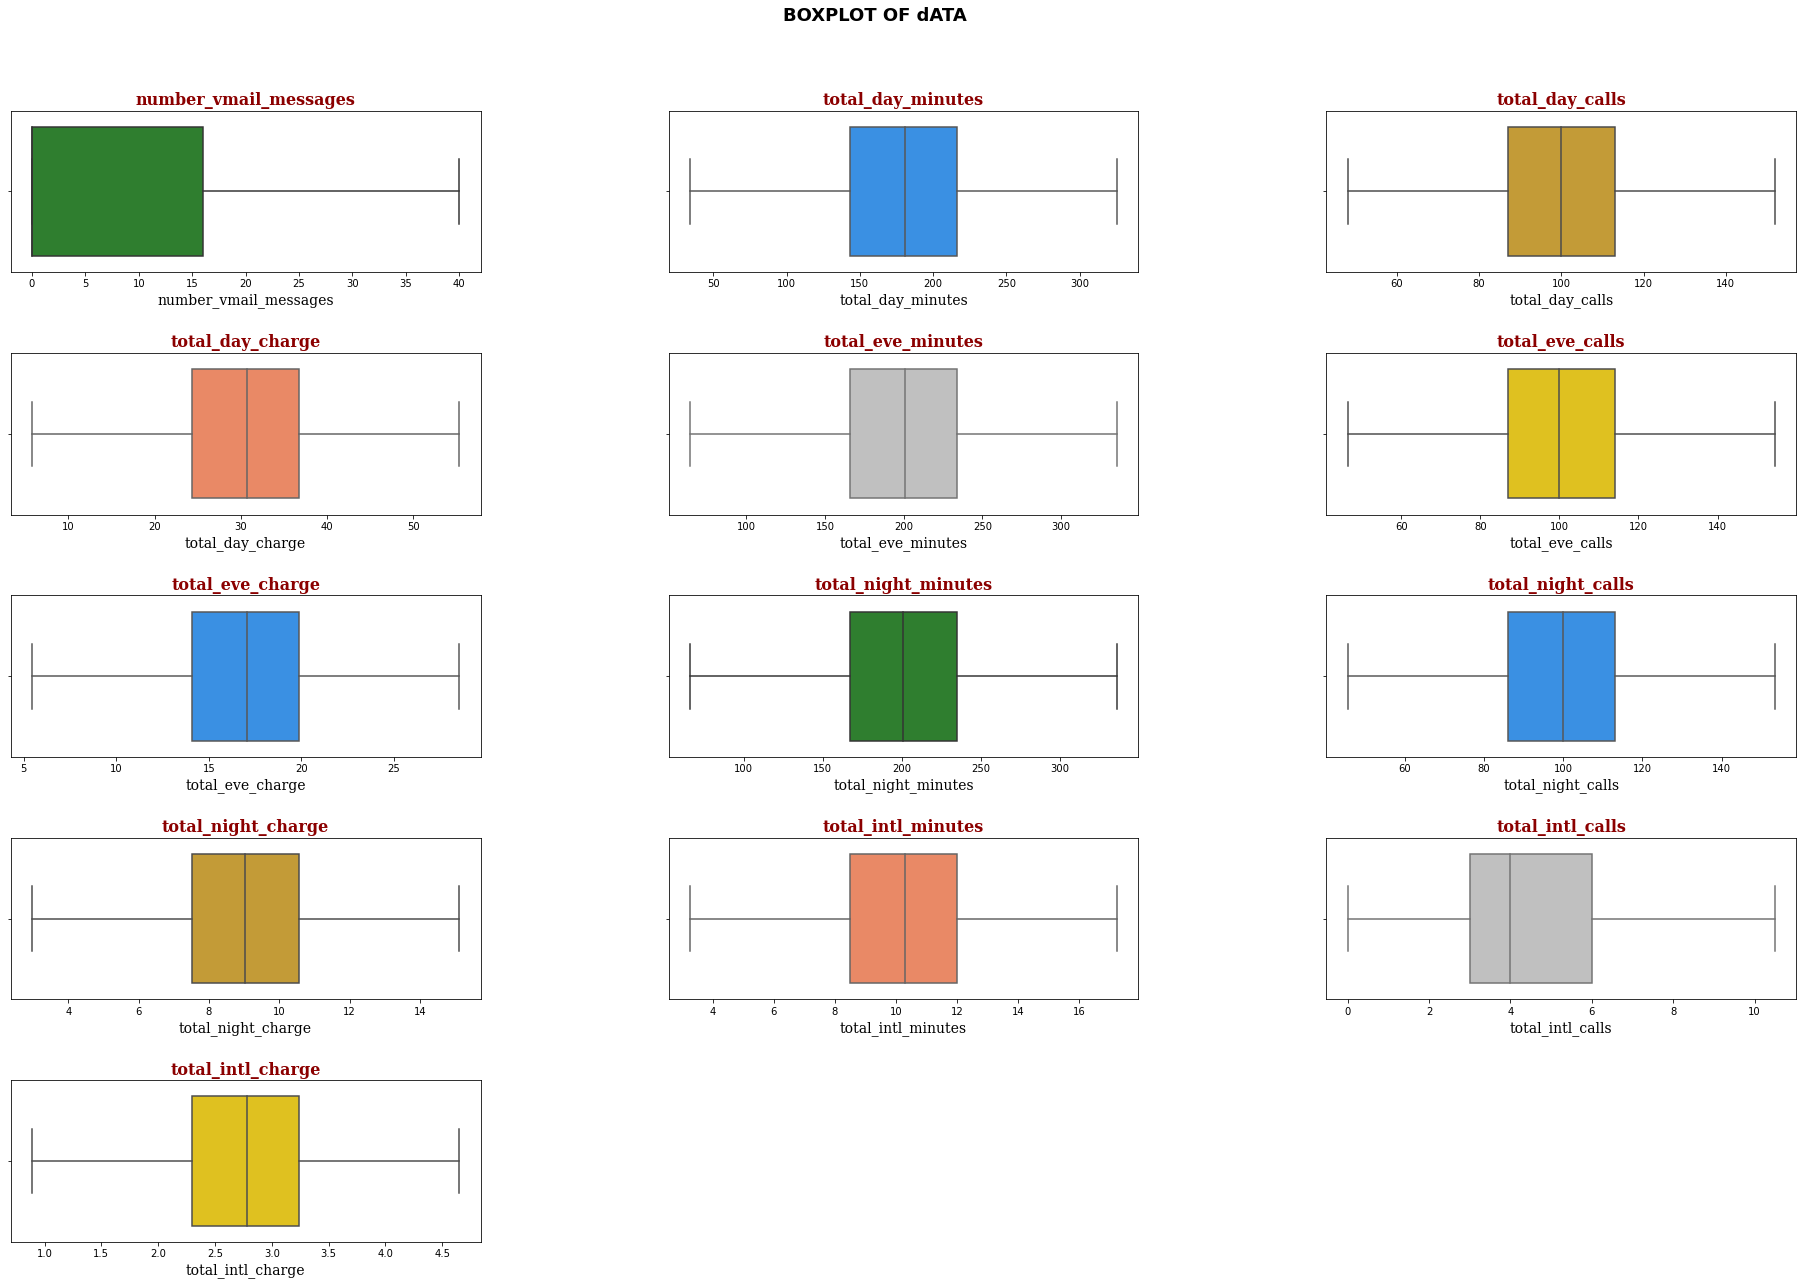

In [25]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
 
    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

In [26]:
df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']


df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0}) 
df['churn'] = df['churn'].map({'yes': 1, 'no': 0}) 

df.drop(columns= ['state', 'area_code'], inplace= True)

In [27]:
df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                 'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [28]:
df.head(10) 

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_net_minutes,total_net_calls,total_net_charge
0,0,1,26.0,13.7,3.0,3.70,1,0,611.50,329.0,55.540
1,0,0,0.0,12.2,5.0,3.29,0,0,527.20,328.0,59.000
2,1,0,0.0,6.6,7.0,1.78,2,0,560.45,248.0,65.215
3,1,0,0.0,10.1,3.0,2.73,3,0,501.90,356.0,49.360
4,0,1,24.0,7.5,7.0,2.03,3,0,766.35,314.0,75.175
5,1,0,0.0,7.1,6.0,1.92,0,0,471.90,269.0,44.980
6,0,0,0.0,8.7,4.0,2.35,1,0,735.85,267.0,69.595
7,1,1,37.0,11.2,5.0,3.02,0,0,807.00,292.0,77.520
8,0,0,0.0,12.7,6.0,3.43,4,1,566.40,331.0,50.770
9,0,0,0.0,9.1,5.0,2.46,0,0,547.10,369.0,54.620


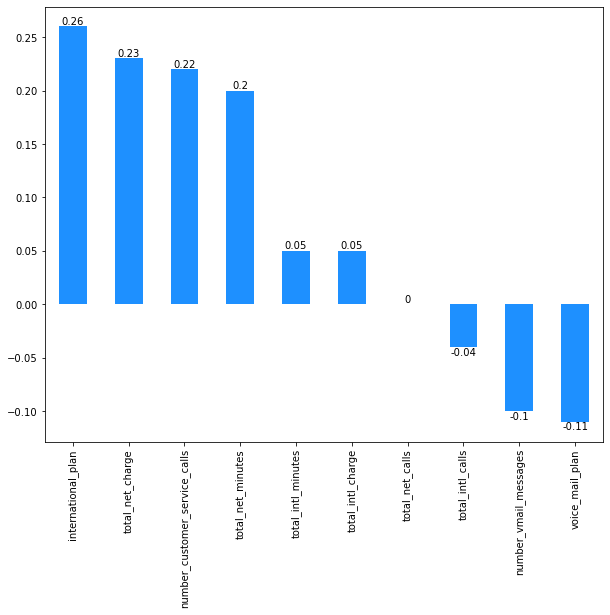

In [29]:
ax = round(df.corr()['churn'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='dodgerblue' , figsize = (10,8))
ax.bar_label(ax.containers[0])
plt.show() 

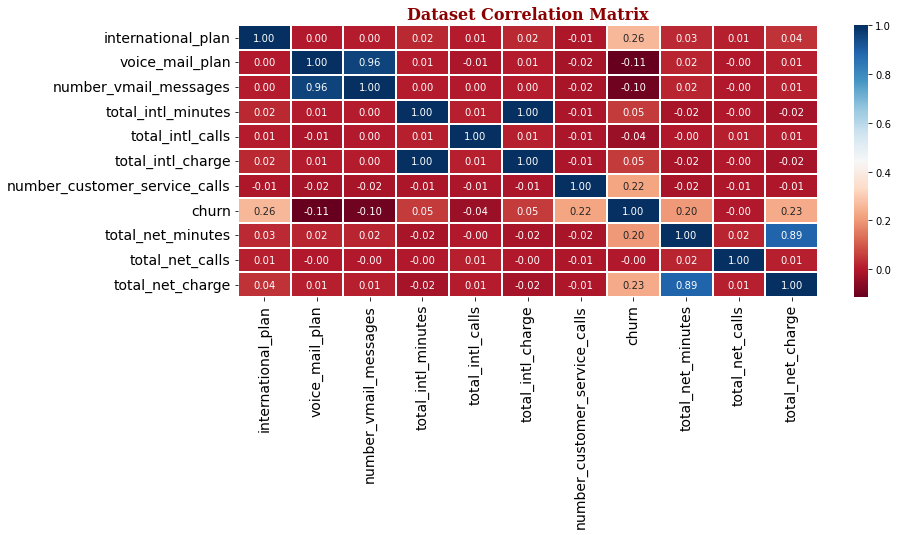

In [30]:
# plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
fig.show() 

In [31]:
X = df.drop('churn' , 1 )
y = df['churn'] 

In [32]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y  ,test_size = 0.20 , random_state = 42)

In [33]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((3400, 10), (3400,), (850, 10), (850,))

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score , classification_report , confusion_matrix  ,roc_curve , roc_auc_score , accuracy_score
from sklearn.metrics import precision_recall_curve , auc ,f1_score , plot_confusion_matrix , precision_score , recall_score
from sklearn.tree import DecisionTreeClassifier

In [35]:
model_list = []
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list= [] 
cross_val_score_list = []

In [37]:
def Model_features(X_train , y_train , X_test , y_test , y_pred , classifier  , model_name):
#     fig ,ax = plt.subplots(figsize = (7,6))
    accuracy , precision , recall , f1_s ,c_val_score= round(accuracy_score(y_test , y_pred) , 3) , round(precision_score(y_test, y_pred, average="micro")  ,3), round(recall_score(y_test , y_pred) ,3), round(f1_score(y_test , y_pred) , 3) , round(cross_val_score(classifier , X , y , cv=10 , scoring='accuracy').mean()  , 3)
    print(f'Accuracy Score is :{accuracy}')
    print(f'Precision Score is :{precision}')
    print(f'Recall Score is :{recall}')
    print(f'f1  Score is :{f1_s}')
    print(f'cross val score is :{c_val_score}')
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_score_list.append(f1_s)
    cross_val_score_list.append(c_val_score)
    
#     print(f'f1  Score is :{round(specificity_score(y_test , y_pred) , 3)}')
    print(metrics.classification_report(y_test, y_pred)) 

In [38]:
# Define a function that plots the feature weights for a classifier.
def feature_weights(X_df, classifier, classifier_name):
    weights = round(pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False) ,2 )
    
    top_weights_selected = weights[:5]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 5 Features')
    ax = top_weights_selected.plot(kind="bar")
    ax.bar_label(ax.containers[0])
    
    return print("")

In [39]:
def confusion_matrix_plot(X_test , y_test , classifier ,classifier_name):
    ax = plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues)

In [40]:
### Logistic Regression
model_lr= LogisticRegression(random_state=0)  
model_lr.fit(X_train, y_train) 
y_pred = model_lr.predict(X_test)
model_lr.score(X_test , y_test)

0.8576470588235294

Accuracy Score is :0.858
Precision Score is :0.858
Recall Score is :0.171
f1  Score is :0.267
cross val score is :0.861
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       721
           1       0.61      0.17      0.27       129

    accuracy                           0.86       850
   macro avg       0.74      0.58      0.59       850
weighted avg       0.83      0.86      0.82       850




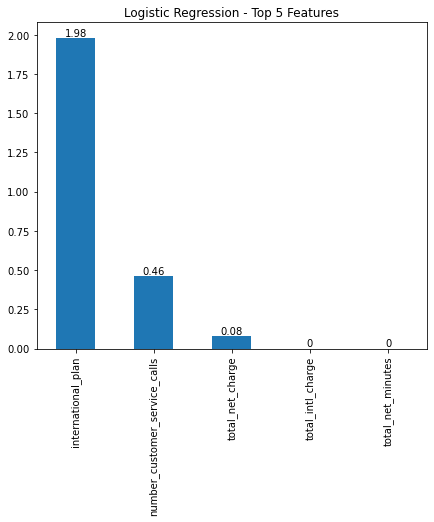

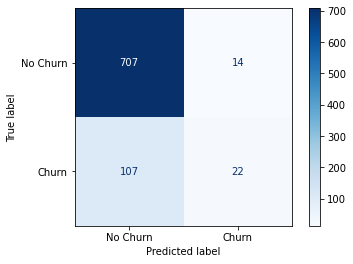

In [41]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , model_lr , "Logistic Reegression")   
feature_weights(X_train , model_lr , "Logistic Regression")
confusion_matrix_plot(X_test , y_test , model_lr , "Logistic Regression")

In [42]:
### SVM
svm = SVC(kernel='rbf', probability=True) 
svm.fit(X_train,y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred = svm.predict(X_test)
svm.score(X_test , y_test)  

0.8482352941176471

Accuracy Score is :0.848
Precision Score is :0.848
Recall Score is :0.0
f1  Score is :0.0
cross val score is :0.859
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       721
           1       0.00      0.00      0.00       129

    accuracy                           0.85       850
   macro avg       0.42      0.50      0.46       850
weighted avg       0.72      0.85      0.78       850



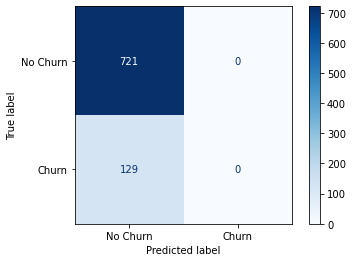

In [43]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , svm , "Support Vector Machine")   
confusion_matrix_plot(X_test , y_test , svm , "Support Vector Machine")

In [45]:
###Decision Tree Classifie
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
dtc.score(X_test , y_test) 

0.9494117647058824

Accuracy Score is :0.949
Precision Score is :0.949
Recall Score is :0.853
f1  Score is :0.837
cross val score is :0.95
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       721
           1       0.82      0.85      0.84       129

    accuracy                           0.95       850
   macro avg       0.90      0.91      0.90       850
weighted avg       0.95      0.95      0.95       850



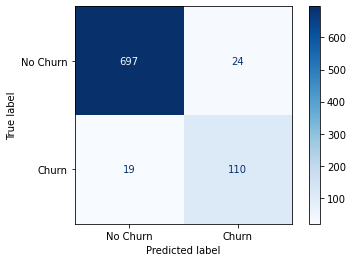

In [46]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , dtc , "Decision Tree Classifier")   
confusion_matrix_plot(X_test , y_test , dtc , "Decision Tree Classifier")


In [47]:
###Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf.score(X_test , y_test) 

0.9764705882352941

Accuracy Score is :0.976
Precision Score is :0.976
Recall Score is :0.868
f1  Score is :0.918
cross val score is :0.975
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       721
           1       0.97      0.87      0.92       129

    accuracy                           0.98       850
   macro avg       0.98      0.93      0.95       850
weighted avg       0.98      0.98      0.98       850



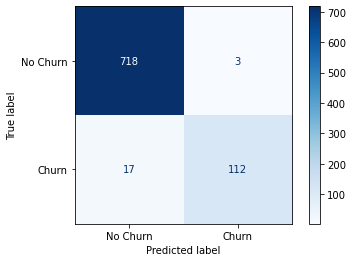

In [48]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , rf , "Random Forest Classifier")   
confusion_matrix_plot(X_test , y_test , rf , "Random Forest Classifier")

In [50]:
###Gradient Boost Classifie
from sklearn.ensemble import GradientBoostingClassifier

xg = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
xg.score(X_test , y_test) 

0.9670588235294117

Accuracy Score is :0.967
Precision Score is :0.967
Recall Score is :0.837
f1  Score is :0.885
cross val score is :0.973
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       721
           1       0.94      0.84      0.89       129

    accuracy                           0.97       850
   macro avg       0.96      0.91      0.93       850
weighted avg       0.97      0.97      0.97       850



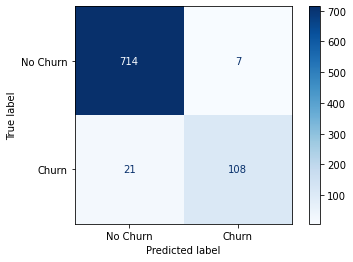

In [53]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , xg , "Gradient Boost Classifier")   
confusion_matrix_plot(X_test , y_test , xg , "Gradient Boost Classifier")

In [54]:
dict = {'Model':model_list, 'Accuracy':accuracy_list , 'Precision':precision_list , 'f1_score':f1_score_list , 'Recall':recall_list ,'Cross_Val_Score':cross_val_score_list}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'Accuracy')
model_df 

,Model,Accuracy,Precision,f1_score,Recall,Cross_Val_Score
3,Random Forest Classifier,0.976,0.976,0.918,0.868,0.975
4,Gradient Boost Classifier,0.967,0.967,0.885,0.837,0.973
2,Decision Tree Classifier,0.949,0.949,0.837,0.853,0.950
0,Logistic Reegression,0.858,0.858,0.267,0.171,0.861
1,Support Vector Machine,0.848,0.848,0.000,0.000,0.859
